In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = 'data'

data = pd.read_csv(os.path.join(path, 'COVID19_open_line_list.csv'))
data = data[['date_confirmation', 'date_death_or_discharge', 'outcome']].copy()

data.head()

,date_confirmation,date_death_or_discharge,outcome
0,22.01.2020,NaN,NaN
1,23.01.2020,NaN,NaN
2,23.01.2020,NaN,NaN
3,23.01.2020,NaN,NaN
4,23.01.2020,NaN,NaN


In [4]:
data['outcome'] = data['outcome'].fillna('NA')

data['outcome'] = data['outcome'].replace(['Death', 'death', 'dead'], 'died')
data['outcome'] = data['outcome'].replace(['Discharged', 'Discharged from hospital', 
                                            'discharge', 'discharged', 'released from quarantine'], 'recovered')

In [11]:
def days_to(data, type_):
    total_days = list()
    for i, row in data.iterrows():
        try:
            start = datetime.strptime(row['date_confirmation'], '%d.%m.%Y')
            end = datetime.strptime(row['date_death_or_discharge'], '%d.%m.%Y')
        except:
            continue

        days = (end - start).days

        if days > 0:
            total_days.append(days)
    
    print('Mininum no. of days:', min(total_days))
    print('Average no. of days:', sum(total_days)//len(total_days))
    print('Maximum no. of days:', max(total_days))
    print('Cases observed:', len(total_days))

    plt.figure(figsize=(10,5))
    plt.boxplot(total_days, vert=False)
    if type_ == 'recovery':
        plt.title('Number of days to recover after confirmation')
    elif type_ == 'death':
        plt.title('Number of days before death after confirmation')
    plt.show()

Mininum no. of days: 1
Average no. of days: 13
Maximum no. of days: 40
Cases observed: 126


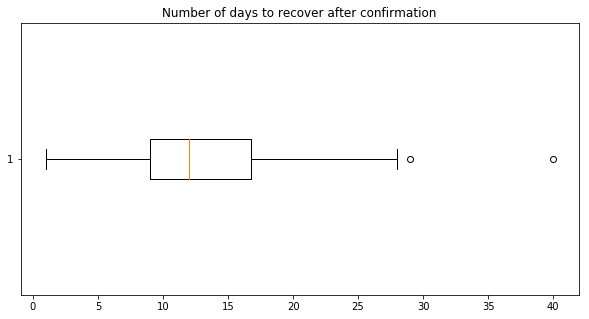

In [12]:
data_recovered = data[data['outcome'] == 'recovered'].dropna()
days_to(data_recovered, 'recovery')

Mininum no. of days: 1
Average no. of days: 4
Maximum no. of days: 18
Cases observed: 15


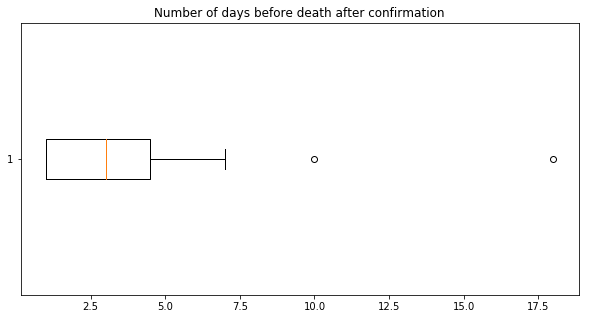

In [13]:
data_death = data[data['outcome'] == 'died'].dropna()
days_to(data_death, 'death')